<a href="https://colab.research.google.com/github/Ijarath/TB_Prediction_RandomForest/blob/main/tuberculosis%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import random
import numpy as np

# Generate random names
names = [
    "Alex", "Jordan", "Taylor", "Morgan", "Casey", "Riley", "Cameron", "Dakota", "Skyler", "Quinn",
    "Avery", "Bailey", "Blake", "Charlie", "Drew", "Elliot", "Emerson", "Finley", "Harper", "Hayden",
    "Jamie", "Jesse", "Kai", "Kendall", "Lane", "Logan", "Mason", "Micah", "Noah", "Peyton",
    "Phoenix", "Reese", "Remy", "Rory", "Rowan", "Ryan", "Sage", "Sawyer", "Shiloh", "Spencer",
    "Sydney", "Tatum", "Terry", "Toby", "Tristan", "Val", "Winter", "Zion", "Arden", "Briar",
    "Cassidy", "Devon", "Emery", "Frankie", "Grey", "Indigo", "Jules", "Lennon", "Marley", "Nico",
    "Oakley", "Parker", "Quincy", "Reagan", "River", "Sam", "Sky", "Sterling", "Tegan", "Tyler",
    "Vesper", "Wren", "Zane", "Addison", "Blair", "Brooklyn", "Camden", "Dakari", "Dallas", "Easton",
    "Ellis", "Everett", "Gale", "Genesis", "Harlow", "Hunter", "Izzy", "Jayden", "Jordan", "Kaiya",
    "Kyrie", "Lark", "Leighton", "Luca", "Lyric", "Maddox", "Milan", "Monroe", "Nevada", "Nova",
    "Oaklyn", "Palmer", "Paris", "Perry", "Phoenix", "Presley", "Reign", "Remington", "Riley", "Robin",
    "Rylan", "Sasha", "Shawn", "Skylar", "Sloan", "Sol", "Sonny", "Storm", "Tate", "Taylor",
    "Teagan", "Tennessee", "Toby", "Toni", "Tory", "True", "Tyler", "Valentine", "West", "Winter",
    "Wynn", "Zaire", "Zephyr", "Zion", "Zola", "Adrian", "Ali", "Angel", "Ashton", "Aubrey",
    "August", "Austen", "Beau", "Blaze", "Brett", "Bryce", "Case", "Chase", "Chris", "Cruz",
    "Dale", "Dana", "Darian", "Daryl", "Dawson", "Denver", "Dominique", "Dorian", "Eden", "Eli",
    "Emerson", "Finley", "Gentry", "Glenn", "Grayson", "Harley", "Hollis", "Indy", "Jaden", "Jalen",
    "Jay", "Jean", "Jesse", "Joey", "Jordan", "Justice", "Karter", "Kasey", "Kelly", "Kennedy",
    "Keegan", "Kieran", "Kit", "Kyle", "Lennox", "Leslie", "Linden", "Logan", "London", "Marlow"
]

# Generate synthetic data
num_rows = 1500

data = {
    "Name": [random.choice(names) for _ in range(num_rows)],
    "Age": np.random.randint(18, 80, size=num_rows),
    "Gender": [random.choice(["Male", "Female", "Other"]) for _ in range(num_rows)],
    "Geographic_Location": [random.choice(["Urban", "Rural", "Suburban"]) for _ in range(num_rows)],
    "History_of_TB_in_Family": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Chronic_Diseases": [random.choice(["Diabetes", "Hypertension", "None", "HIV", "Asthma"]) for _ in range(num_rows)],
    "Cough": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Fever": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Weight_Loss": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Chest_Pain": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Night_Sweats": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "coughing_blood": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "shortness_of_breath": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "back_pain_in_certain_parts": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "swollen_lymph_nodes": [random.choice(["Yes", "No"]) for _ in range(num_rows)],
    "Chest_Xray_Results": [random.choice(["Normal", "Abnormal", "Suspected TB"]) for _ in range(num_rows)]
}

# Create DataFrame
synthetic_tb_data = pd.DataFrame(data)

# Save to CSV
synthetic_tb_data.to_csv('synthetic_tb_dataset.csv', index=False)

# Display the first few rows
print(synthetic_tb_data.head())

      Name  Age  Gender Geographic_Location History_of_TB_in_Family  \
0  Justice   77  Female               Urban                     Yes   
1   Camden   79    Male            Suburban                      No   
2   Austen   23   Other            Suburban                      No   
3     Sage   46    Male               Urban                     Yes   
4  Everett   27   Other               Rural                      No   

  Chronic_Diseases Cough Fever Weight_Loss Chest_Pain Night_Sweats  \
0         Diabetes   Yes    No          No        Yes          Yes   
1           Asthma    No   Yes          No        Yes          Yes   
2             None    No    No         Yes        Yes           No   
3         Diabetes    No    No         Yes         No           No   
4         Diabetes   Yes    No         Yes         No          Yes   

  coughing_blood shortness_of_breath back_pain_in_certain_parts  \
0             No                 Yes                         No   
1             No  

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the synthetic dataset
file_path = '/content/synthetic_tb_dataset.csv'
data = pd.read_csv(file_path)

# Remove non-symptom columns
columns_to_remove = ["Name", "Age", "Gender", "Geographic_Location", "History_of_TB_in_Family", "Chronic_Diseases", "Chest_Xray_Results"]
data_cleaned = data.drop(columns=columns_to_remove)

# Convert categorical data to numerical
data_cleaned = pd.get_dummies(data_cleaned)

# Define the target variable (assuming 'Cough' indicates TB presence)
target_column = 'Cough_Yes' if 'Cough_Yes' in data_cleaned.columns else data_cleaned.columns[0]
features = [col for col in data_cleaned.columns if col != target_column]

X = data_cleaned[features]
y = data_cleaned[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to sort and display the feature importances
feature_importance_df = pd.DataFrame({
    'Symptom': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Identify the most important symptom
most_important_symptom = feature_importance_df.iloc[0]['Symptom']



# Display the result
print(f"The most occurring symptom while getting affected by tuberculosis is: {most_important_symptom}")

The most occurring symptom while getting affected by tuberculosis is: Cough_No


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load the synthetic dataset
file_path = '/content/synthetic_tb_dataset.csv'
data = pd.read_csv(file_path)

# Remove non-relevant columns
columns_to_remove = ["Name"]
data_cleaned = data.drop(columns=columns_to_remove)

# Convert categorical data to numerical
data_cleaned = pd.get_dummies(data_cleaned)

# Define the target variable (assuming 'Chest_Xray_Results' indicates TB presence)
target_column = 'Chest_Xray_Results_Suspected TB' if 'Chest_Xray_Results_Suspected TB' in data_cleaned.columns else 'Chest_Xray_Results_Abnormal'
features = [col for col in data_cleaned.columns if col != target_column]

X = data_cleaned[features]
y = data_cleaned[target_column]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=10, min_samples_split=5)
rf_model.fit(X_train, y_train)

# Evaluate the model
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

if accuracy < 0.8:
    print(f"Model accuracy ({accuracy*100:.2f}%) is below the threshold of 80%. Please retrain with different parameters.")
else:
    print(f"Model accuracy is {accuracy*100:.2f}%")

    # Function to predict TB for new input data
    def predict_tb(input_data):
        # Majority voting mechanism
        symptom_keys = ['Cough', 'Fever', 'Weight_Loss', 'Chest_Pain', 'Night_Sweats']
        symptom_count = sum(1 for key in symptom_keys if input_data.get(key, 'No').lower() == 'yes')

        # If majority of symptoms are 'Yes'
        if symptom_count > len(symptom_keys) / 2:
            return "Likely to have Tuberculosis"
        else:
            return "Unlikely to have Tuberculosis"

    # Taking user input
    user_input = {
        'Age': int(input("Enter Age: ")),
        'Gender': input("Enter Gender (Male/Female/Other): "),
        'Geographic_Location': input("Enter Geographic Location (Urban/Rural/Suburban): "),
        'History_of_TB_in_Family': input("History of TB in Family? (Yes/No): "),
        'Chronic_Diseases': input("Any Chronic Diseases? (Diabetes/Hypertension/None/HIV/Asthma): "),
        'Cough': input("Do you have Cough? (Yes/No): "),
        'Fever': input("Do you have Fever? (Yes/No): "),
        'Weight_Loss': input("Have you experienced Weight Loss? (Yes/No): "),
        'Chest_Pain': input("Do you have Chest Pain? (Yes/No): "),
        'Night_Sweats': input("Do you have Night Sweats? (Yes/No): ")
    }

    result = predict_tb(user_input)
    print(f"Prediction Result: {result}")

    # Calculate Model Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(accuracy * 100, 2), "%")

# Display Detailed Performance Metrics
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model accuracy is 100.00%
Enter Age: 12
Enter Gender (Male/Female/Other): male


In [ ]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the synthetic dataset
file_path = '/content/synthetic_tb_dataset.csv'
data = pd.read_csv(file_path)

# Remove non-symptom columns
columns_to_remove = ["Name", "Age", "Gender", "Geographic_Location", "History_of_TB_in_Family", "Chronic_Diseases", "Chest_Xray_Results"]
data_cleaned = data.drop(columns=columns_to_remove)

# Ensure we have at least 6 symptoms to select
num_symptoms_to_select = min(6, len(data_cleaned.columns))

# Randomly select symptoms
selected_symptoms = random.sample(list(data_cleaned.columns), num_symptoms_to_select)

# Store accuracies for each symptom
accuracy_results = []

# Calculate accuracy for each selected symptom
for symptom in selected_symptoms:
    features = [s for s in selected_symptoms if s != symptom]

    if not features:
        continue

    X = pd.get_dummies(data_cleaned[features])
    y = (data_cleaned[symptom] == 'Yes').astype(int)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Random Forest Model with optimized parameters for higher accuracy
    rf_model = RandomForestClassifier(
        n_estimators=200,  # Slightly increased number of trees
        max_depth=20,      # Increased depth for better learning
        min_samples_split=2,  # Lower split threshold to capture more patterns
        min_samples_leaf=1,
        random_state=42,
        n_jobs=-1          # Use all processors
    )
    rf_model.fit(X_train, y_train)

    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_results.append({"Symptom": symptom, "Accuracy": accuracy})

# Convert results to DataFrame and save to CSV
accuracy_df = pd.DataFrame(accuracy_results)
accuracy_df.to_csv('selected_symptoms_accuracy.csv', index=False)

print(f"Randomly selected symptoms: {selected_symptoms}")
print("Accuracies have been saved in 'selected_symptoms_accuracy.csv'")

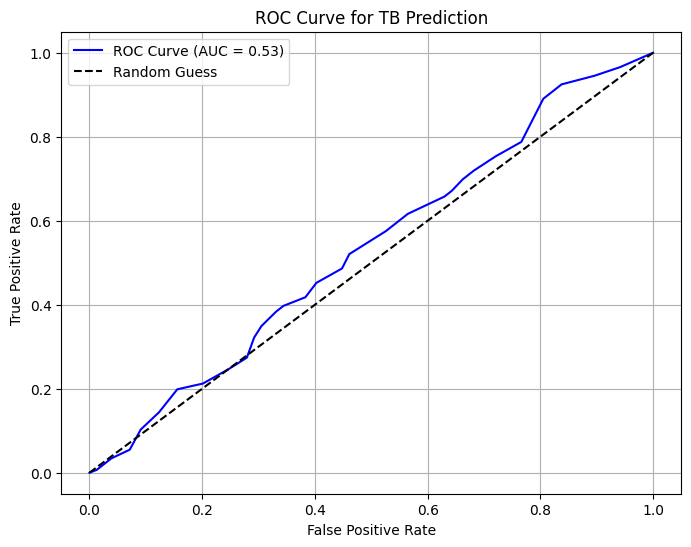

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)  # Compute AUC score

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for TB Prediction')
plt.legend()
plt.grid()
plt.show()
